<a href="https://colab.research.google.com/github/sanjay2097/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>What is Customer Segmentation?
###Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

### <b>Why Segment Customers?
###Segmentation allows marketers to better tailor their marketing efforts to various audience subsets.By better understanding the customer, and therefore being able to target them more effectively, you can drive greater loyalty. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

* #### Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).
* #### Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment. 
* #### Identify ways to improve products or new product or service opportunities.
* #### Establish better customer relationships.
* #### Test pricing options.
* #### Focus on the most profitable customers.
* #### Improve customer service.
* #### Upsell and cross-sell other products and services.

### <b> Problem Description 

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [275]:
import numpy as np
import pandas as pd

import math
import datetime as dt

import missingno as msno
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [276]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
data = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [278]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [279]:
#data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [280]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


####We can see that there are negative values in quantity and unitprice columns.

In [281]:
#Checking missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

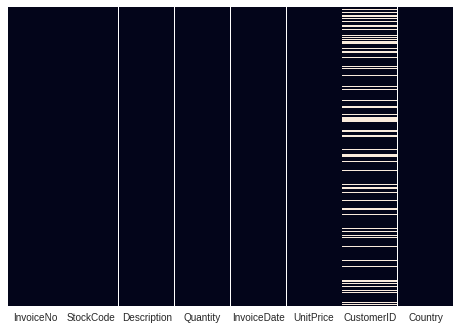

In [282]:
#Heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

####Most of the missing values are present in CustomerID 

In [283]:
#Copying the datframe
df = data.copy()

In [284]:
#RFemoving all missing values from customerid
df.dropna(subset=['CustomerID'],how='all',inplace=True)
df.shape

(406829, 8)

In [285]:
#Taking only invoices which were not cancelled
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

#Taking only postive values from variables
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.shape

(397884, 8)

In [286]:
#Removing duplicates
df.drop_duplicates(inplace=True)

###EDA

In [287]:
#Checking unique list of countries in dataset
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

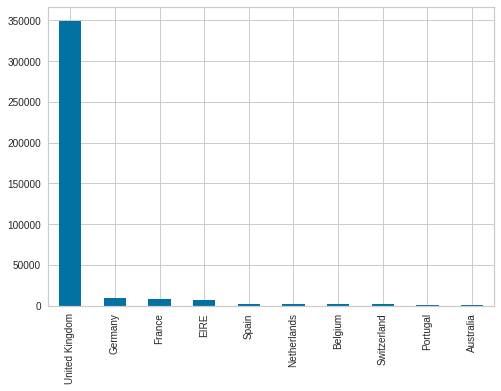

In [288]:
df['Country'].value_counts().head(10).plot(kind='bar')

###Most of the data is from UK, since different region can affect clustering we will only consider data from UK

In [289]:
# Dataset on United Kingdom 
df_uk = df.loc[df['Country'] == 'United Kingdom']

In [290]:
df_uk.shape

(349203, 8)

In [291]:
#Calculate revenue
df_uk['Revenue'] = df_uk['Quantity'] * df_uk['UnitPrice']

In [292]:
# Adding new features month , day and hour from invoice date
df_uk['hour'] = df_uk['InvoiceDate'].dt.hour 
df_uk['day'] = df_uk['InvoiceDate'].dt.day_name()
df_uk['month'] = df_uk['InvoiceDate'].dt.month_name()

In [293]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,hour,day,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,Wednesday,December


In [294]:
#total unique cunstomers
df_uk['CustomerID'].nunique()

3920

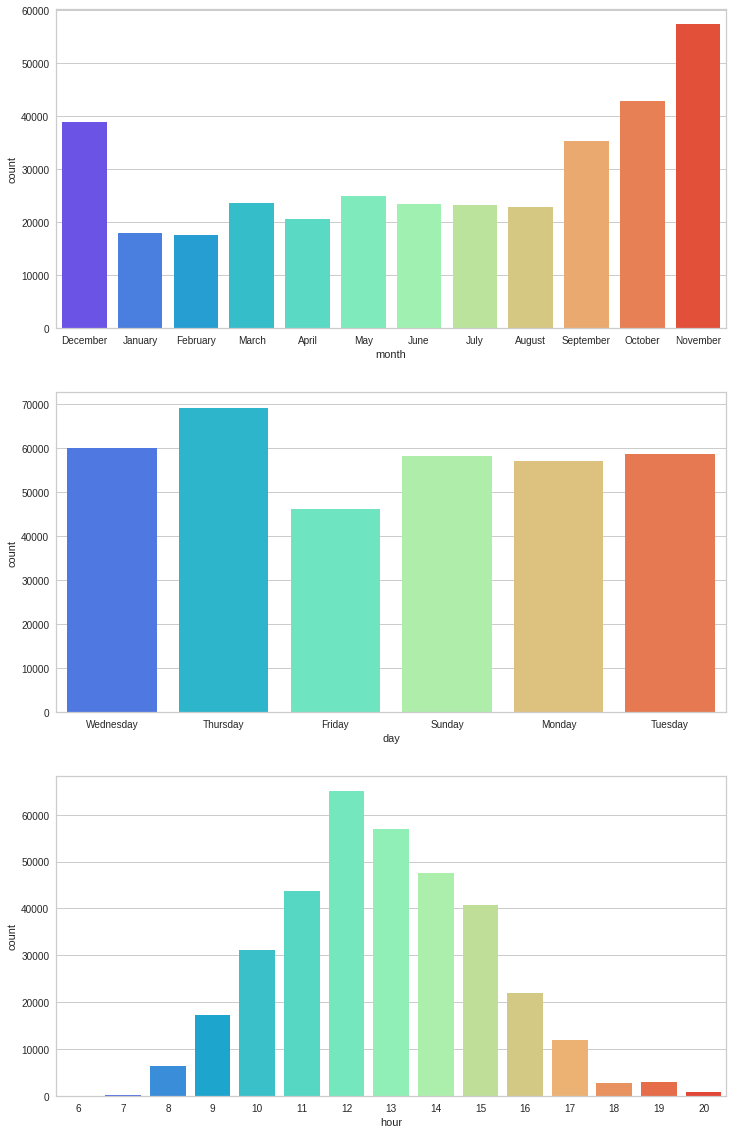

In [295]:
columns = ['month','day','hour']
fig = plt.figure(figsize=(12,20))
for i in range(len(columns)):
  col=columns[i]
  sub=fig.add_subplot(3,1,i+1)
  chart = sns.countplot(data=df_uk,x=col,palette='rainbow')

####Few months - september , october , november & december have maximum sales.
####Thursdays have comparatively higher sales than other weekdays.
####Most of the sales are happening between 11 a.m. to 3 p.m.

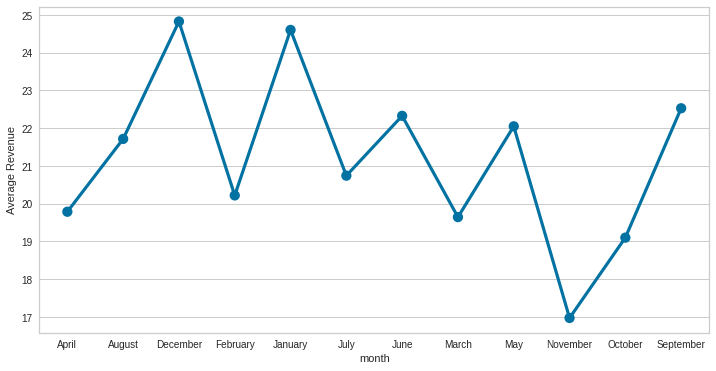

In [296]:
#average revenue per month
group1 = df_uk.groupby('month').Revenue.mean()
plt.figure(figsize = (12,6))
sns.pointplot(x=group1.index, y=group1.values)
plt.ylabel('Average Revenue')
plt.xlabel('month')
plt.show()

####The highest revenue occurs for months December and January. The reason could be becuase of holiday season people tend to shop for gifs which genearte higher revenue.

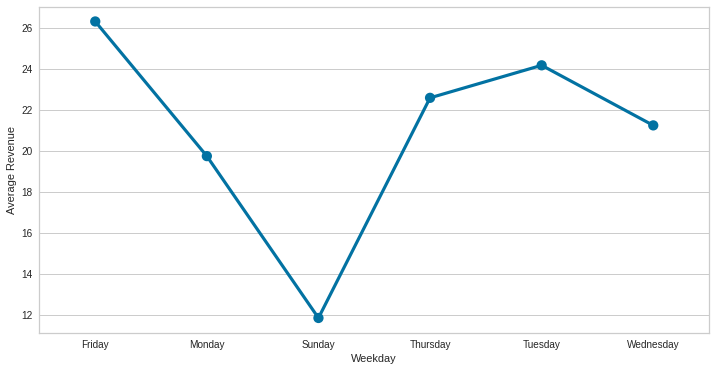

In [297]:
#average revenue per month
group1 = df_uk.groupby('day').Revenue.mean()
plt.figure(figsize = (12,6))
sns.pointplot(x=group1.index, y=group1.values)
plt.ylabel('Average Revenue')
plt.xlabel('Weekday')
plt.show()

####The maximum revenue is generated during Friday also Sunday has minimum revenue.

In [298]:
#Add 1 day to the maximum onvoice date in order to effectively count number of days and to avoid 0 value
import datetime as dt
NOW = df_uk['InvoiceDate'].max() + dt.timedelta(1)
NOW

Timestamp('2011-12-10 12:49:00')

In [299]:
#most popular products
df_uk.groupby(['StockCode','Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Description,Quantity
2514,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2016,23166,MEDIUM CERAMIC TOP STORAGE JAR,76919
2690,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
3548,85099B,JUMBO BAG RED RETROSPOT,41878
3555,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34630
2795,84879,ASSORTED COLOUR BIRD ORNAMENT,32628
1031,22197,POPCORN HOLDER,28923
1426,22616,PACK OF 12 LONDON TISSUES,24321
37,17003,BROCADE RING PURSE,22675
356,21212,PACK OF 72 RETROSPOT CAKE CASES,22442


In [300]:
df_uk['CustomerID'] = df_uk['CustomerID'].astype('int64') #change format CustomerID

In [301]:
df_uk.drop(['hour','day','month'],axis=1,inplace=True) #removing added features

##**RFM Analysis**
###RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

###RECENCY (R): Days since last purchase
###FREQUENCY (F): Total number of purchases
###MONETARY VALUE (M): Total money this customer spent. We will create those 3 customer attributes for each customer.

In [302]:
# Aggregate data on a customer level
rfm_data = df_uk.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                             'InvoiceNo': 'count',
                                             'Revenue': 'sum'}).rename(columns = {'InvoiceDate': 'recency',
                                                                                   'InvoiceNo': 'frequency',
                                                                                   'Revenue': 'monetary'})

# Check the first rows
rfm_data.head()

,CustomerID,recency,frequency,monetary
0,12346,326,1,77183.60
1,12747,2,103,4196.01
2,12748,1,4412,33053.19
3,12749,4,199,4090.88
4,12820,3,59,942.34


###Interpretation:

CustomerID 12346 has frequency: 1, monetary value: $77183.60 and recency: 326 days.

CustomerID 12747 has frequency: 103, monetary value: $4196.01 and recency: 2 days.

In [303]:
#Let's check the details of the first customer
df_uk[df_uk['CustomerID']== 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6




The first customer has shopped only once, bought one item at a huge quantity(74215). The unit price is very low, seems a clearance sale.

###Segmented RFM table using quartiles
The easiest way to split metrics into segments is by using quartile.

This gives us a starting point for detailed analysis
4 segments are easy to understand and explain

In [304]:
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,recency,frequency,monetary
0.25,14208.75,18.0,17.0,298.185
0.50,15569.50,51.0,40.0,644.975
0.75,16913.25,143.0,98.0,1571.285


In [305]:
#Convert quantiles to dictionary
quantiles = quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 14208.75, 0.5: 15569.5, 0.75: 16913.25},
 'frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'monetary': {0.25: 298.185, 0.5: 644.9749999999999, 0.75: 1571.2849999999999},
 'recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0}}

####Lowest recency, highest frequency and monetary of best customers
For recency a good customer would be a part of the lowest quartile designated as '1'

For frequency and monetary a good customer would be a part of the highest quartile here designated as '1'

In [306]:
#Create functions to separate customers into segments such as 1,2,3,4 based on quantile allocation.

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [307]:
# Assign segments to customers

rfm_data['r_quartile'] = rfm_data['recency'].apply(RScore, args=('recency',quantiles,))
rfm_data['f_quartile'] = rfm_data['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_data['m_quartile'] = rfm_data['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [308]:
rfm_data.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12346,326,1,77183.60,4,4,1
1,12747,2,103,4196.01,1,1,1
2,12748,1,4412,33053.19,1,1,1
3,12749,4,199,4090.88,1,1,1
4,12820,3,59,942.34,1,2,2


###Inferences
* #### Best customers :
RFM Score: 111

Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.

Marketing Strategies: Focus on loyalty programs and new product introductions. These customers have proven to have a higher willingness to pay, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through product recommendations based on previous purchases.

* #### Big Spenders
RFM Score: XX1

Who They Are: Customers who have generated the most revenue for your store.

Marketing Strategies: These customers have demonstrated a high willingness to pay. Consider premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts. 

* #### Loyal customers
RFM Score: X1X

Who They Are: Customers who buy the most often from your store.

Marketing Strategies: Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with Free Shipping or other like benefits.

* #### Newest Customers
RFM Score: 14X

Who They Are: First time buyers on your site.

Marketing Strategies: Most customers never graduate to loyal. Having clear strategies in place for first time buyers such as triggered welcome emails will pay dividends.

In [309]:
#Create a new column with combined RFM Score

rfm_data['RFM_Segment'] = rfm_data.r_quartile.map(str) \
                            + rfm_data.f_quartile.map(str) \
                            + rfm_data.m_quartile.map(str)
rfm_data['RFM_Score'] = rfm_data[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
rfm_data.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score
0,12346,326,1,77183.60,4,4,1,441,9
1,12747,2,103,4196.01,1,1,1,111,3
2,12748,1,4412,33053.19,1,1,1,111,3
3,12749,4,199,4090.88,1,1,1,111,3
4,12820,3,59,942.34,1,2,2,122,5


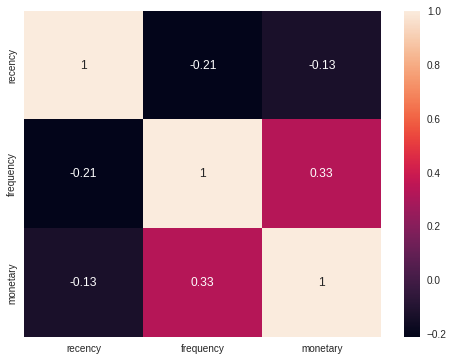

In [310]:
#Correlation
c= rfm_data[['recency','frequency','monetary']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=c,cmap="rocket",annot=True)
plt.show()

###Observation :

####Frequency and monetary value are positively correlated with each other implying an increase in frequency implies increase in monetary value

####Frequency and Recency are negatively correlated with each other implying an increase in frequency implies decrease in monetary value

###**Preprocessing data for Clustering**

####We are going to prepare the data for Kmeans clustering on RFM Score data. To do this, we need to preprocess the data so that it can meet the key assumptions of Kmeans algorithm, which are:

* #### The varaiables should be distributed symmetrically
* #### Variables should have similar average values
* #### Variables should have similar standard deviation values

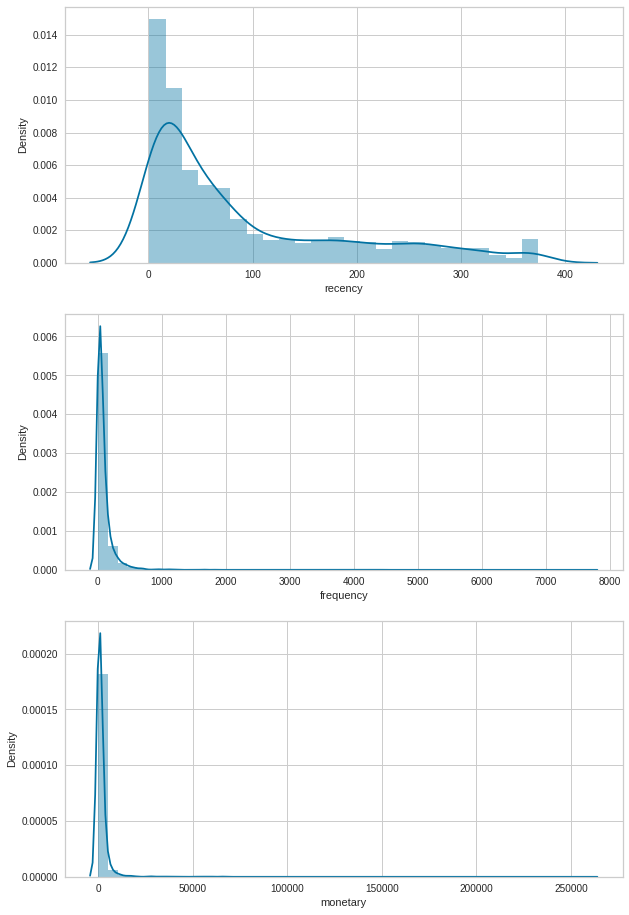

In [311]:
# Distribution plot
plt.figure(figsize=(10,16))

# Plot recency 
plt.subplot(3, 1, 1); sns.distplot(rfm_data['recency'])

# Plot frequency 
plt.subplot(3, 1, 2); sns.distplot(rfm_data['frequency'])

# Plot monetary value 
plt.subplot(3, 1, 3); sns.distplot(rfm_data['monetary'])

plt.show()

###All distributions are highly right skewed. We have make these distributions normal in order to create meaningful clusters

In [312]:
#performing log tranformation
data_log = np.log(rfm_data[['recency','frequency','monetary']]+1)

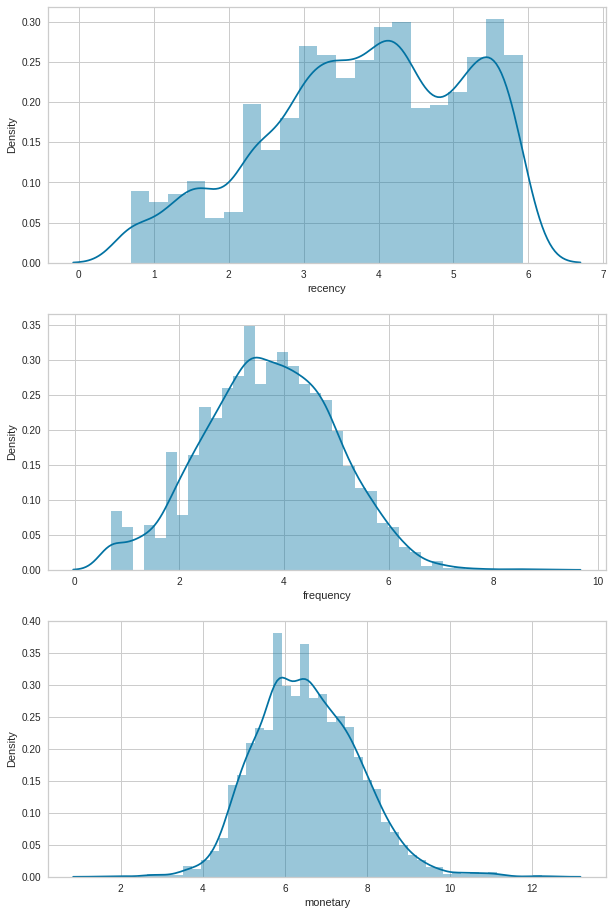

In [313]:
plt.figure(figsize=(10,16))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_log['recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_log['frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_log['monetary'])

plt.show()

In [314]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_log)

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_normalized, index=data_log.index, columns=data_log.columns)
data_norm

,recency,frequency,monetary
0,1.463769,-2.407557,3.788077
1,-2.035554,0.743030,1.447841
2,-2.337994,3.731493,3.106498
3,-1.654524,1.264449,1.427453
4,-1.820969,0.304442,0.248157
...,...,...,...
3915,1.345357,-1.048249,-1.076036
3916,1.026700,-1.302173,-1.716813
3917,-1.216088,-0.915045,-1.087401
3918,-1.654524,2.288034,0.870602


##Model Building


####**Silhouette Coefficient**
####The Silhouette Coefficient is defined for each sample and is composed of two scores(shown in below), and a higher Silhouette Coefficient score relates to a model with better defined clusters.

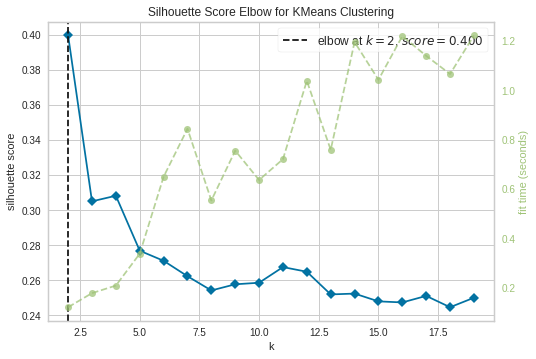

In [315]:
#visualizing silhouette score using yellowbrick
#fit KMeans 
for k in range(2, 20):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)

from yellowbrick.cluster import KElbowVisualizer
visu = KElbowVisualizer(kmeans, k=(2, 20), metric='silhouette')
visu.fit(data_norm)
visu.show()

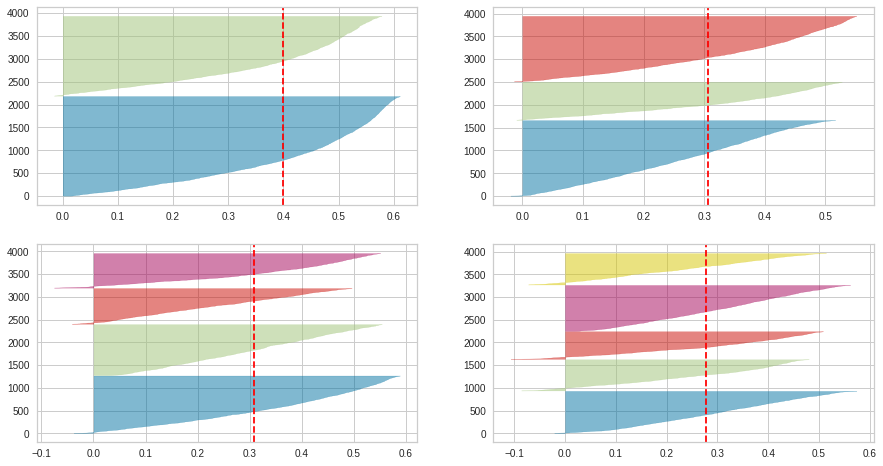

In [316]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_norm)

####**Calinski-Harabasz Inde**x
####The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

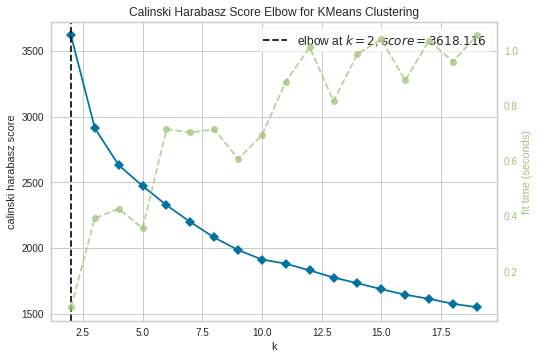

In [317]:
#visualizing calinski harabasz index using yellowbrick
#fit KMeans 
for k in range(2, 20):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)

from yellowbrick.cluster import KElbowVisualizer
visu = KElbowVisualizer(kmeans, k=(2, 20), metric='calinski_harabasz')
visu.fit(data_norm)
visu.show()

###The optimal number of clusters seems to be 2

In [318]:
# Function for cluster summary 
def sum_clusters(labels):

    # Create a cluster label column in the original DataFrame
    data = rfm_data.assign(Cluster = labels)

    # Calculate average RFM values and size for each cluster
    summary = data.groupby(['Cluster']).agg({'recency': 'mean',
                                                        'frequency': 'mean',
                                                        'monetary': ['mean', 'count'],}).round(1)

    return summary

#Function for visualizing cluters using snakeplot
def plot_cluster(labels):
    data = data_norm.assign(Cluster = labels)
    data.index = rfm_data['CustomerID'].astype(int)
    
    # Melt the normalized dataset and reset the index
    data_melt = pd.melt(data.reset_index(), 
                            
    # Assign CustomerID and Cluster as ID variables                  
                        id_vars=['CustomerID', 'Cluster'],

    # Assign RFM values as value variables
                        value_vars=['recency', 'frequency', 'monetary'], 
                            
    # Name the variable and value
                        var_name='Attribute', value_name='Value')
    
    # Visualize the cluster plot
    plt.figure(figsize=(10,6))
    sns.pointplot('Attribute', 'Value', hue='Cluster', data=data_melt)
    plt.show()

In [319]:
# Initialize KMeans clustering
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=1)

# Fit k-means clustering on the normalized data set
kmeans.fit(data_norm)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [320]:
#summary for kmeans clustering
summary_kmeans = sum_clusters(cluster_labels)
summary_kmeans

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0          31.0     170.0   3614.6  1743
1         141.2      24.3    452.3  2177

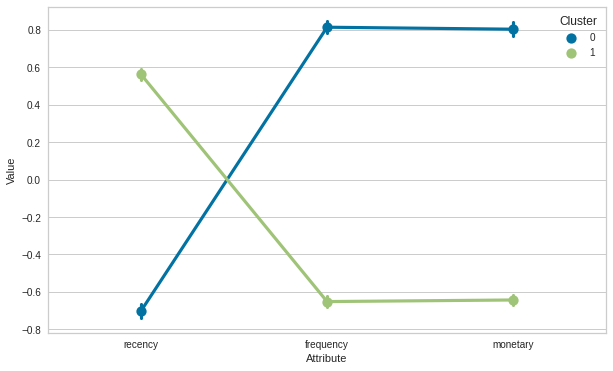

In [321]:
#snakeplot for kmeans cluster
plot_cluster(cluster_labels)

##Hierarchical Agglomerative Clustering

In [322]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

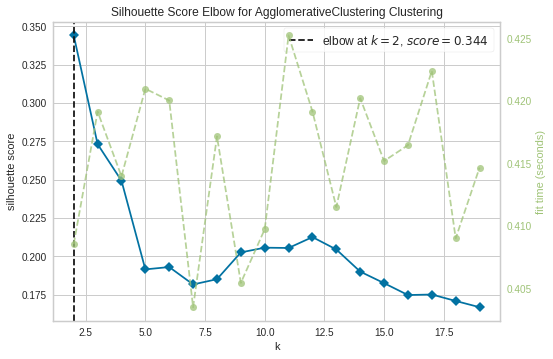

In [323]:
#visualizing elbow using yellowbrick
# Fit KMeans 
for k in range(2, 20):
  
    # Initialize KMeans with k clusters
    Hmeans = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    
    # Fit KMeans on the normalized dataset
    Hmeans.fit(data_norm)

from yellowbrick.cluster import KElbowVisualizer
visu = KElbowVisualizer(Hmeans, k=(2, 20), metric='silhouette')
visu.fit(data_norm)
visu.show()

####**Davies-Bouldin Index**
####This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index relates to a model with better separation between the clusters.

In [324]:
from sklearn.metrics import davies_bouldin_score
def get_Hmeans_score(data, center):  
    #---------------instantiate Hierarchical Clustering
    
    hmeans = AgglomerativeClustering(n_clusters=center, affinity= 'euclidean', linkage='ward')
    
    #---------------Then fit the model to the data using the fit method
    model = hmeans.fit_predict(data)

    #---------------Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    return score

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

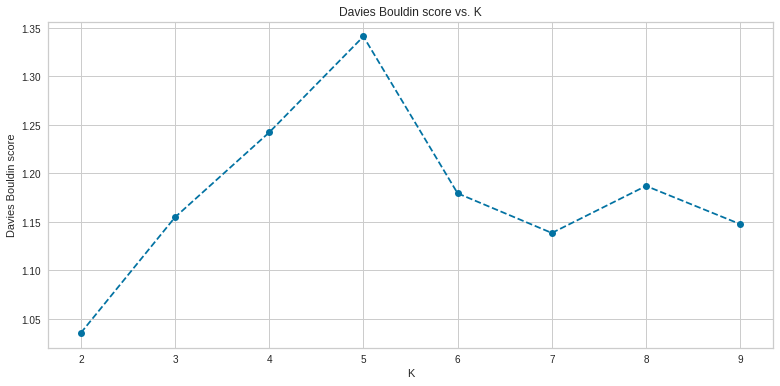

In [325]:
centers = list(range(2, 10)) #------Number of Clusters in the data
avg_scores = []
for center in centers:
 avg_scores.append(get_Hmeans_score(data_norm,center))
plt.figure(figsize=(13,6));
 
plt.plot(centers, avg_scores, linestyle= '--' , marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')

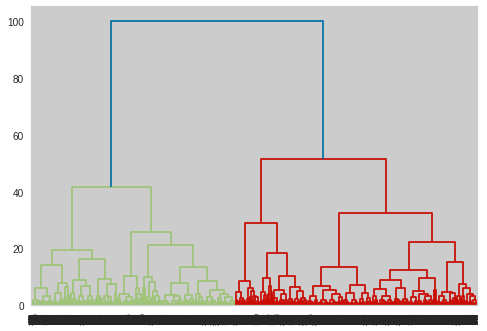

In [326]:
#visualizing dendogram for clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='ward'))

###The optimal number of cluster is 2

In [327]:
#using hierarchical model
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(data_norm)
labels = model.labels_

In [328]:
#cluster summary for Agglomerative model
summary_hmeans = sum_clusters(labels)
summary_hmeans

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0          47.3     146.4   3066.2  2125
1         145.4      21.2    428.6  1795

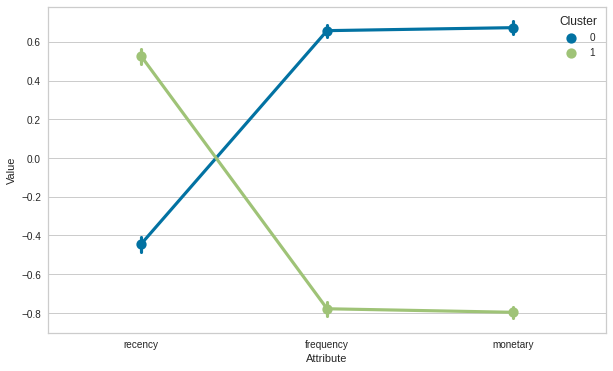

In [329]:
#snakeplot for Agglomerative clusters
plot_cluster(labels)

###Here are some of the key outcomes :
The Dataset was large enough summing around 5.4 lakh samples with most of the samples from UK.

For the segmentation we used RMF Technique to create working table as it is most common segmentation technique.

Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.

Appropriate Transformations were applied on the data to satisfy the key assumptions , followed by Standardization.

K Means and Hierarchical Agglomerative Clustering algorithms were applied and appropriate cluster number was selected using Elbow Plot.

The results were interepreted by calculating the cluster means & it was visualised with help of snake plot.